# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline

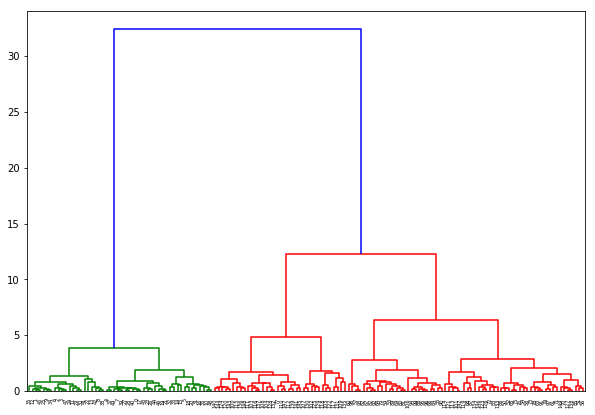

In [3]:
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))  
dendrogram(linked, )
plt.show()  

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
import numpy as np

In [16]:
cluster_set = list(range(2,10))

For n_clusters = 2 The average silhouette_score is : 0.6867350732769776
For n_clusters = 3 The average silhouette_score is : 0.5543236611296415
For n_clusters = 4 The average silhouette_score is : 0.4889670857554686
For n_clusters = 5 The average silhouette_score is : 0.48438258927905886
For n_clusters = 6 The average silhouette_score is : 0.3592376192603073
For n_clusters = 7 The average silhouette_score is : 0.3422071936620491
For n_clusters = 8 The average silhouette_score is : 0.3435906599119526
For n_clusters = 9 The average silhouette_score is : 0.33048863528746475


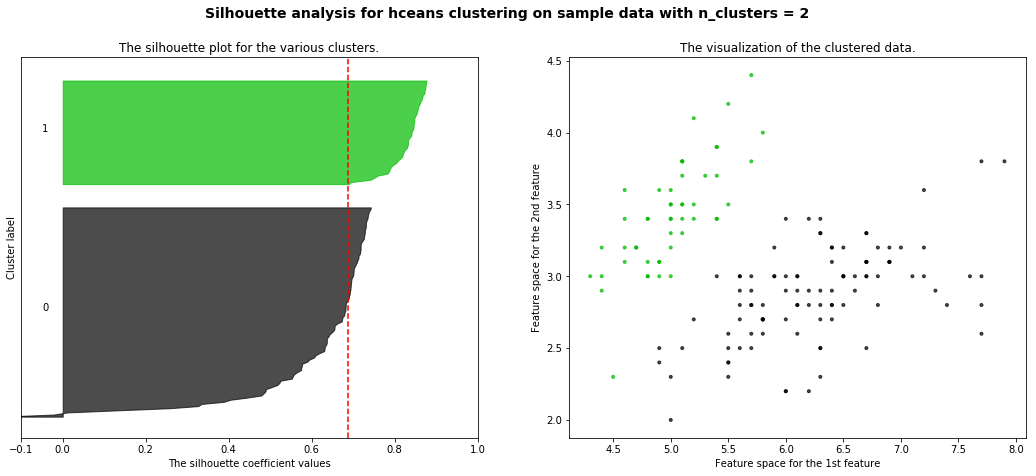

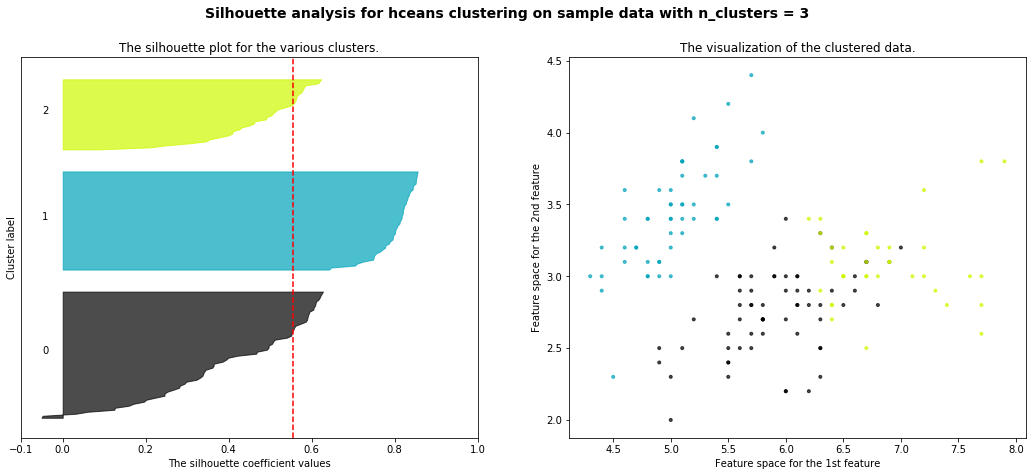

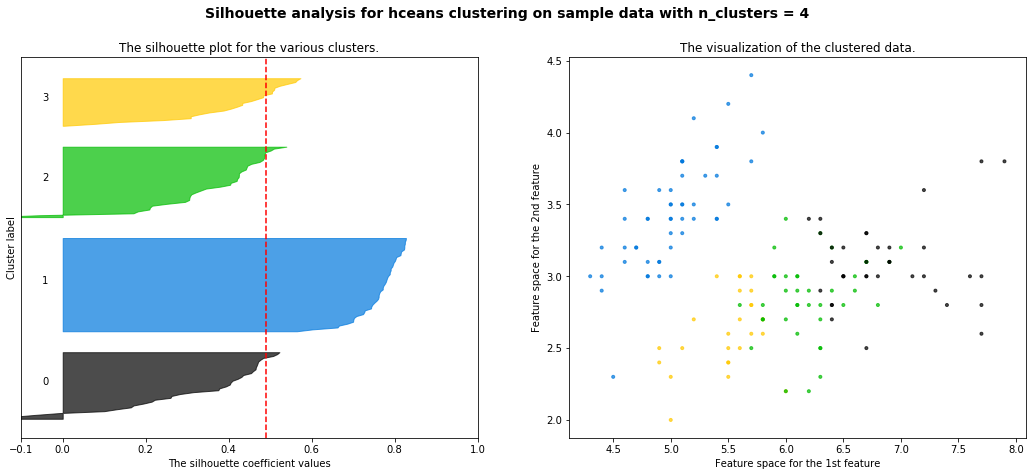

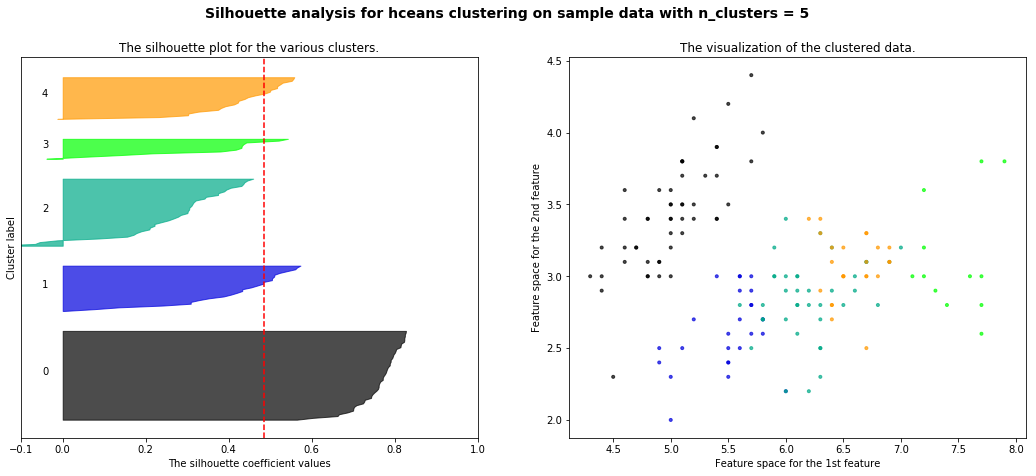

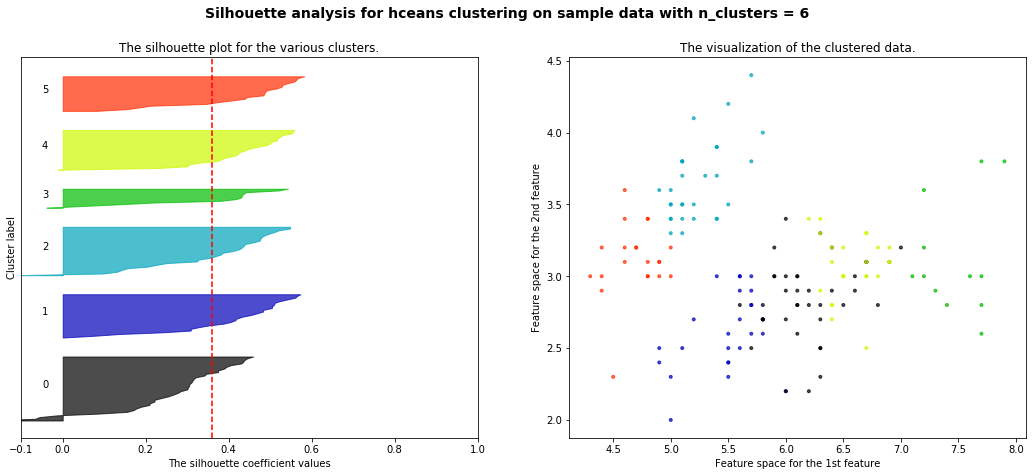

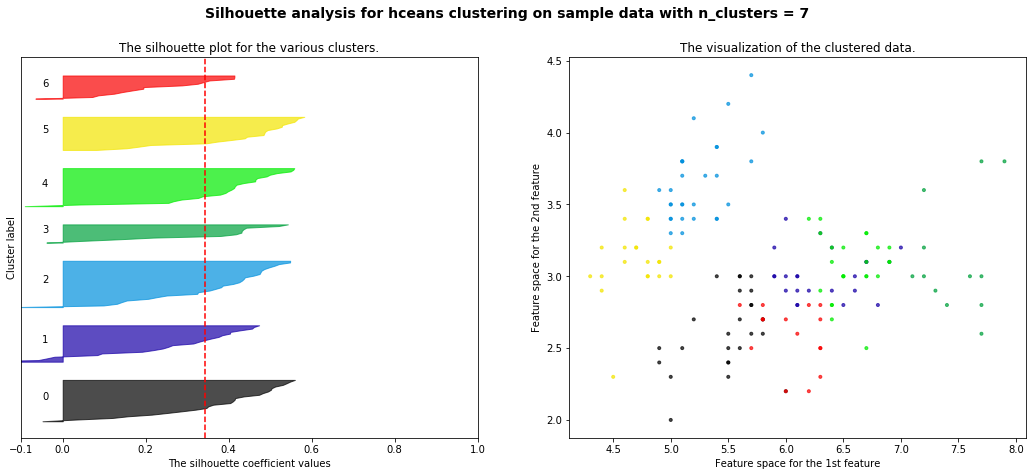

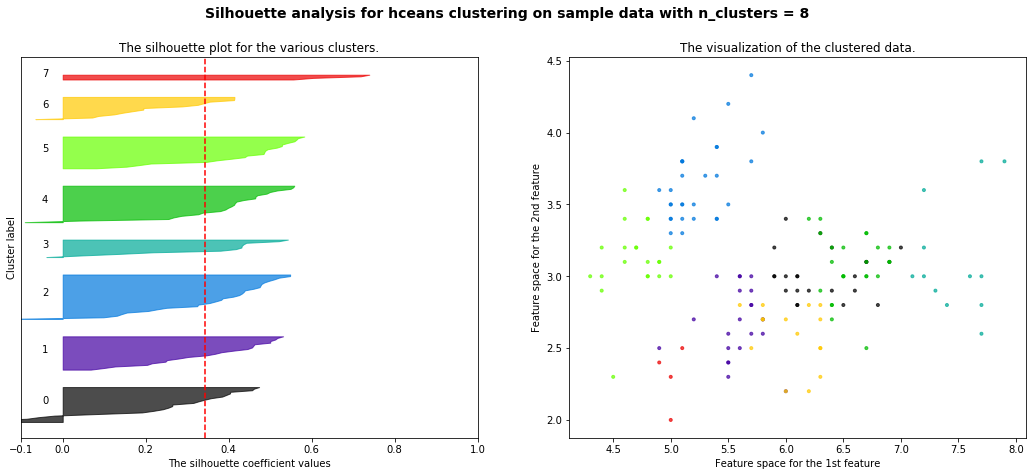

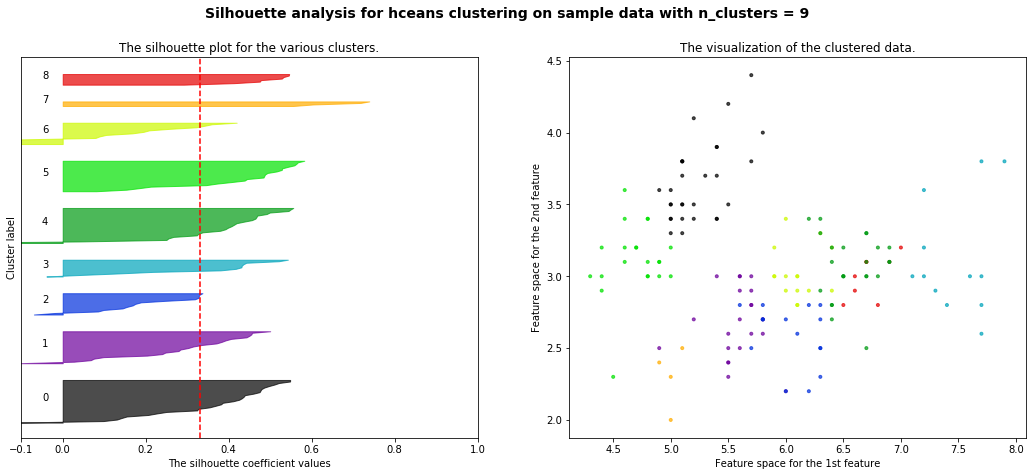

In [18]:
# 計算並繪製輪廓分析的結果
for n_cluster in cluster_set:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,7))
    
    # adjust xlim & ylim
    ax1.set_xlim(-0.1, 1)
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])
    ax1.set_yticks([])
    
    # training K-means algorithm
    hc = AgglomerativeClustering(n_clusters= n_cluster)
    cluster_labels = hc.fit_predict(X)
    
    # calculate mean of silhouette_score
    X_silhouette_score = silhouette_score(X=X, labels=cluster_labels)
    print('For n_clusters = {} The average silhouette_score is : {}'.format(n_cluster, X_silhouette_score))
    
    
    X_silhouette_samples = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_cluster):
        ith_cluster_silhouette_values = X_silhouette_samples[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        y_upper = y_lower + ith_cluster_silhouette_values.shape[0]
        
        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, (y_upper + y_lower)/2, str(i))
        y_lower = y_upper +10
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=X_silhouette_score, color="red", linestyle="--")
    
    color = cm.nipy_spectral(cluster_labels / n_cluster)
    ax2.scatter(X[:,0], X[:,1], c = color, marker='.', alpha = 0.7)
    
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for hceans clustering on sample data "
                  "with n_clusters = {}".format(n_cluster)),
                 fontsize=14, fontweight='bold')